In [1]:
from CentralStreamingModel.utils.read_probabilities import VD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from CentralStreamingModel.utils.plot_tools import plot_mean_attribute
from CentralStreamingModel.utils.plot_tools import compute_mean_error

In [4]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 11

central_halos = []
for i, box in enumerate(n_boxes):
    central_halos.append(VD('galaxies',box, boxsize, snapshot))


In [5]:
m, s = compute_mean_error(central_halos, 'mean', 'r')

<ErrorbarContainer object of 3 artists>

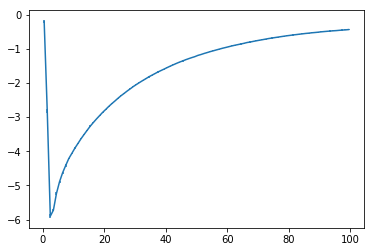

In [6]:
plt.errorbar(central_halos[0].r, m, yerr = s)

In [7]:
central_halos_pdf = [halo.jointpdf for halo in central_halos]

mean_central_halos_pdf = np.mean(central_halos_pdf, axis=0)
std_central_halos_pdf = np.std(central_halos_pdf, axis=0)

In [8]:
marginal_r = [halo.marginal.r for halo in central_halos]
mean_r = np.mean(marginal_r, axis=0)
std_r = np.std(marginal_r, axis=0)

In [9]:
marginal_t = [halo.marginal.t for halo in central_halos]
mean_t = np.mean(marginal_t, axis=0)
std_t = np.std(marginal_t, axis=0)

In [10]:
def jointplot( x, y, jointpdf, marginal_r, marginal_r_std, 
              marginal_t, marginal_t_std, log=False, cbar = None, cbar_plot=False):
    '''

    Plots the joint PDF of two random variables together with its marginals
        Args:
            x and y, random variables,
            jointpdf, their joint PDF

    '''
    levels = np.linspace(-7.,-1.,20)
    marginals_color = 'darkblue'
    nullfmt = NullFormatter()         # no labels
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    fig = plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    if(log == True):
        scatter = axScatter.contourf(x, y, np.log10(jointpdf), levels=levels)
    else:
        scatter = axScatter.contourf(x, y, jointpdf, levels=levels)


    axHistx.errorbar(y, marginal_r, yerr=marginal_r_std,
                 color = marginals_color, linewidth=1,marker='o',
                markersize=3, linestyle='-')
    axHistx.set_yscale('log')
    axHisty.errorbar(marginal_t, x, xerr = marginal_t_std,
                 color= marginals_color, linewidth=1,marker='o',
                markersize=3, linestyle='-')
    axHisty.set_xscale('log')
  
    axHistx.grid()
    axHisty.grid()

    axScatter.set_xlabel(r'$v_r$ [Mpc/h]')
    axScatter.set_ylabel(r'$v_t$ [Mpc/h]')
    
    if cbar_plot:
        cbar = fig.colorbar(scatter, anchor=(0.4,0.0))
        cbar.set_label('$log_{10}[\mathcal{P}(v_r, v_t | r)]$') 

    axHistx.set_ylabel(r'$\mathcal{P}(v_r | r)$')
    axHisty.set_xlabel(r'$\mathcal{P}(v_t |r)$')
    plt.show()
    
    if cbar == None:
        return cbar

In [11]:
halos = central_halos

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


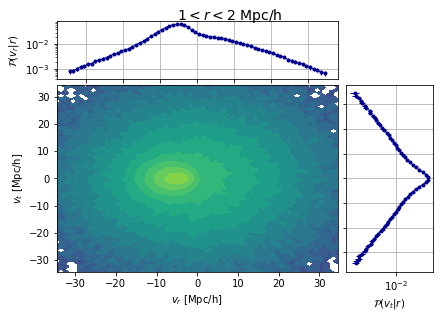

<Figure size 432x288 with 0 Axes>

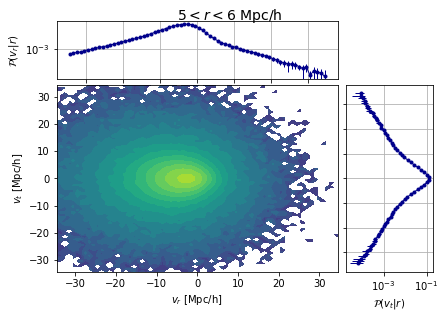

<Figure size 432x288 with 0 Axes>

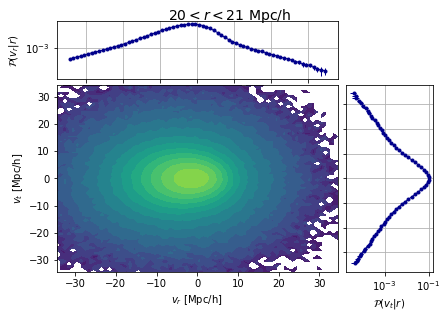

<Figure size 432x288 with 0 Axes>

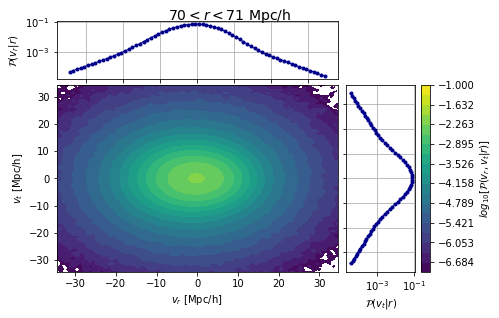

<Figure size 432x288 with 0 Axes>

In [12]:
rbins = [1,5,20,70]

for i, r in enumerate(rbins):
    plt.suptitle(r'$ %d < r < %d $ Mpc/h'%(halos[0].r[r] - halos[0].wr/2, halos[0].r[r+1]-halos[0].wr/2),
                y=1.02, fontsize=14)
    if i == 0:
        cbar = jointplot(halos[0].v.r, halos[0].v.t, 
                         mean_central_halos_pdf[r], mean_r[r], std_r[r],  mean_t[r], std_t[r], 
                log=True)
    elif i == len(rbins)-1:
        jointplot(halos[0].v.r, halos[0].v.t, mean_central_halos_pdf[r], 
                  mean_r[r], std_r[r], mean_t[r], std_t[r],
                  log=True, cbar_plot=True)
    else:
        jointplot(halos[0].v.r, halos[0].v.t, mean_central_halos_pdf[r],
                  mean_r[r], std_r[r], mean_t[r], std_t[r],
                  log=True, cbar=cbar)

    plt.subplots_adjust(top=0.88)

    #plt.savefig(plots_dir + 'hals_rt_%d.pdf'%i, dpi = 240,bbox_inches='tight', bbox_extra_artists=[my_suptitle])

    plt.show()

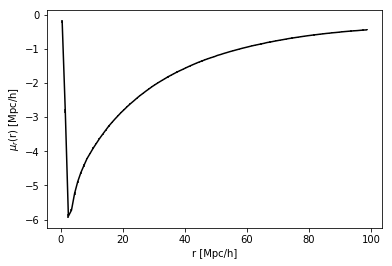

In [13]:
colors = ['black']
labels = None
plot_mean_attribute([central_halos],
    colors,
    labels,
    'mean', 'r', '$\mu_r$(r) [Mpc/h]')



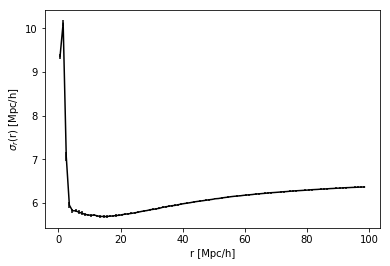

In [14]:
plot_mean_attribute([central_halos],
    colors,
    labels,
    'std', 'r', '$\sigma_r$(r) [Mpc/h]')

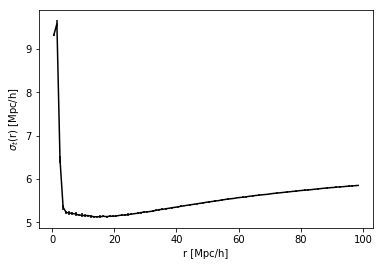

In [15]:
plot_mean_attribute([central_halos],
    colors,
    labels,
    'std', 't', '$\sigma_t$(r) [Mpc/h]')

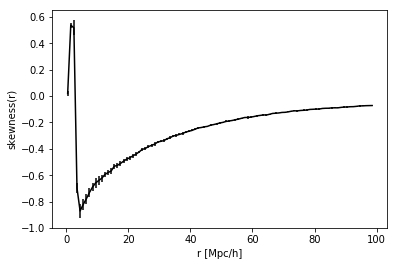

In [16]:
plot_mean_attribute([central_halos],
    colors,
    labels,
    'skewness', 'r', 'skewness(r)')

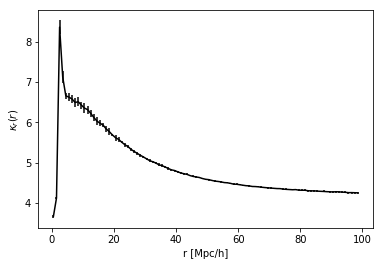

In [18]:
plot_mean_attribute([central_halos],
    colors,
    labels,
    'kurtosis', 'r', '$\kappa_r (r)$')

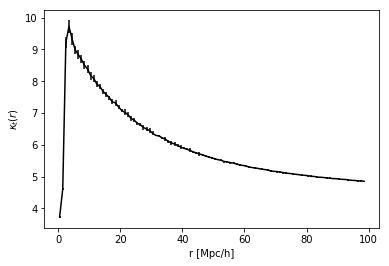

In [19]:
plot_mean_attribute([central_halos],
    colors,
    labels,
    'kurtosis', 't', '$\kappa_t (r)$')